In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
index_names = ['engine', 'cycle']
# Operational conditions: altitude, mach_number and throttle_resolver_angle
operational_condition_names = ['altitude', 'TRA', 'mach_nr']
sensor_names = ['T2', # total temperature at fan inlet
                'T24',# total temperature at LPC outlet
                'T30', # total temperature at HPC outlet
                'T50', # total temperature at LPT outlet
                'P2', # Pressure at fan inlet
                'P15', #Total pressure in bypass-duct
                'P30', #Total pressure at HPC outlet
                'Nf', #Physical fan speed rpm
                'Nc', #Physical core speed rpm
                'epr', #Engine pressure ratio (P50/P2)
                'Ps30', #Static pressure at HPC outlet
                'phi', #Ratio of fuel flow to Ps30
                'NRf', #Corrected fan speed
                'NRc', #Corrected core speed
                'BPR', #Bypass Ratio
                'farB', #Burner fuel-air ratio
                'htBleed', #Bleed Enthalpy
                'Nf_dmd', # Demanded fan speed rpm
                'PCNfR_dmd', #Demanded corrected fan speed rpm
                'W31', #HPT coolant bleed lbm/s
                'W32', #LPT coolant bleed
                ]
# options to visualize the datadrame
pd.set_option('display.width', 100)
col_names = index_names + operational_condition_names + sensor_names
df = pd.read_csv('data/train_FD001.txt', sep=' ', lineterminator='\n', header=0, index_col=False, names=col_names)
print(df.columns)
print(df.head(5))


Index(['engine', 'cycle', 'altitude', 'TRA', 'mach_nr', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15',
       'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd',
       'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')
   engine  cycle  altitude     TRA  mach_nr      T2     T24      T30      T50     P2  ...     phi  \
0       1      2    0.0019 -0.0003    100.0  518.67  642.15  1591.82  1403.14  14.62  ...  522.28   
1       1      3   -0.0043  0.0003    100.0  518.67  642.35  1587.99  1404.20  14.62  ...  522.42   
2       1      4    0.0007  0.0000    100.0  518.67  642.35  1582.79  1401.87  14.62  ...  522.86   
3       1      5   -0.0019 -0.0002    100.0  518.67  642.37  1582.85  1406.22  14.62  ...  522.19   
4       1      6   -0.0043 -0.0001    100.0  518.67  642.10  1584.47  1398.37  14.62  ...  521.68   

       NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0  2388.07  8131.49  8.4318  0.03      392    2388      100.0 

Text(0.5, 1.0, 'Engine3')

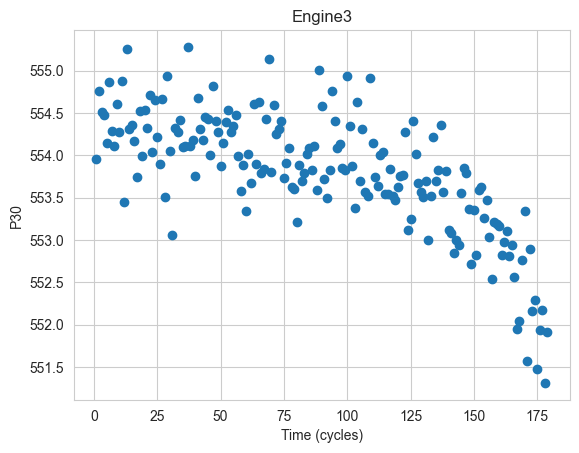

In [258]:
# condition monitoring signals
engine_id = 3
v2_engine1 = df.loc[df['engine'] == engine_id, 'P30']
time_engine1 = df.loc[df['engine'] == engine_id, 'cycle']
plt.scatter(time_engine1,v2_engine1)
plt.xlabel('Time (cycles)')
plt.ylabel('P30')
plt.title('Engine' + str(engine_id))

Text(0.5, 1.0, 'Engine3')

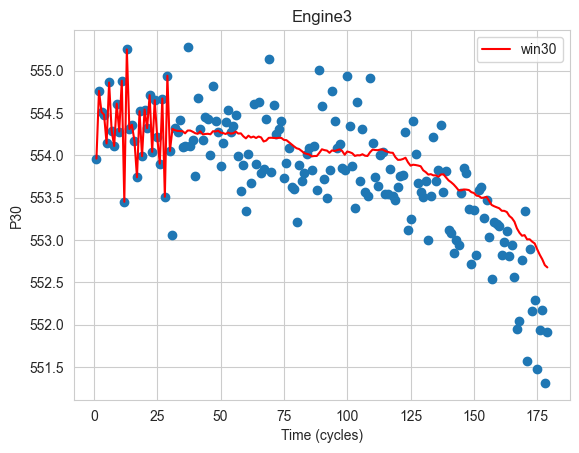

In [259]:
engine_id = 3
v2_engine1 = df.loc[df['engine'] == engine_id, 'P30']

param_window30 =  v2_engine1.rolling(30).mean()
param_window30 = list(v2_engine1.rolling(30).mean())

for i in range(30):
    param_window30[i] = v2_engine1.values[i]

param_window5 = v2_engine1.rolling(5).mean()
param_window100 = v2_engine1.rolling(100).mean()

time_engine1 = df.loc[df['engine'] == engine_id, 'cycle']
plt.scatter(time_engine1,v2_engine1)
plt.plot(time_engine1, param_window30, label='win30', c='red')
plt.legend()
plt.xlabel('Time (cycles)')
plt.ylabel('P30')
plt.title('Engine' + str(engine_id))


Text(0, 0.5, 'Operational Condition mach_nr')

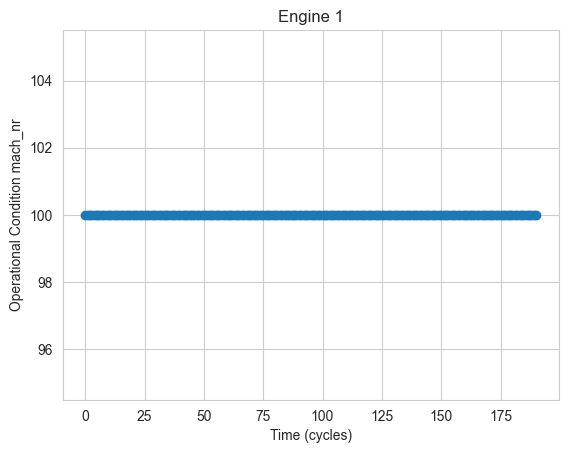

In [260]:
# operational conditions
op_condition_name = 'mach_nr'
op_engine1 = df.loc[df.engine == 1, op_condition_name]
plt.scatter(range(len(op_engine1)), op_engine1)
plt.xlabel('Time (cycles)')
plt.title('Engine 1')
plt.ylabel('Operational Condition ' + op_condition_name)

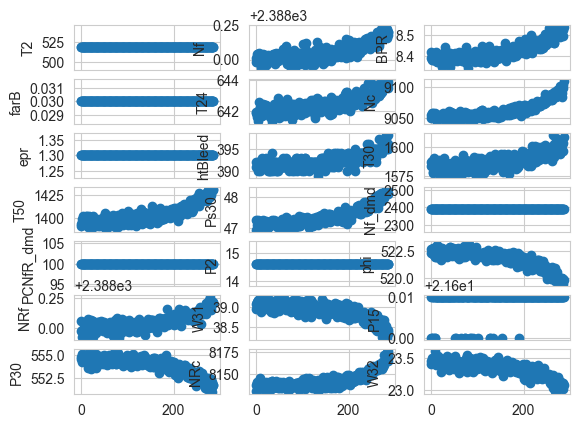

In [261]:
# plot all signals of one engine
figure, axis = plt.subplots(7, 3)

for i in range(21):
    feature_name = sensor_names[i]
    engine_id = 2
    signal = df.loc[df.engine == engine_id, feature_name]
    axis[i % 7, i % 3].scatter(range(len(signal)), signal)
    axis[i % 7, i % 3].set_ylabel(feature_name)

<Axes: >

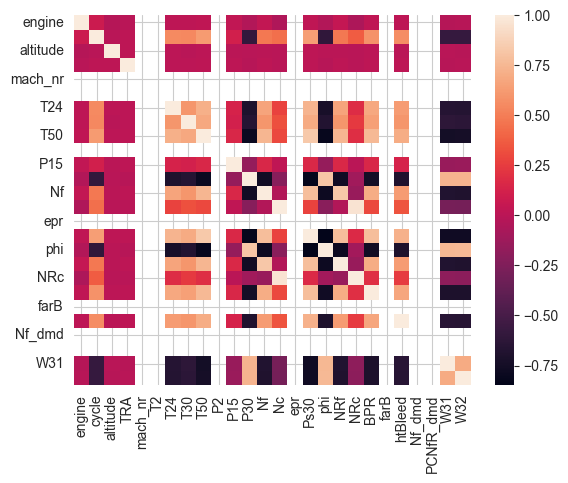

In [262]:
#correlation map of the dataset
sns.heatmap(df.corr())

In [263]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')# coolwarm
# check https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

/Users/marciabaptista/PycharmProjects/MMA_2024/venv/lib/python3.11/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/marciabaptista/PycharmProjects/MMA_2024/venv/lib/python3.11/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,engine,cycle,altitude,TRA,mach_nr,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
engine,1.000000,0.078632,-0.017923,-0.006312,nan,nan,0.013991,0.012611,0.026041,nan,0.026445,-0.031982,0.039889,-0.052130,nan,0.024687,-0.031857,0.044146,-0.059500,0.022438,nan,0.013449,nan,nan,-0.020478,-0.016367
cycle,0.078632,1.000000,-0.004551,0.016030,nan,nan,0.549840,0.543969,0.624557,nan,0.105997,-0.595882,0.475969,0.443968,nan,0.634403,-0.611366,0.477484,0.370326,0.588670,nan,0.566978,nan,nan,-0.583555,-0.585888
altitude,-0.017923,-0.004551,1.000000,0.011640,nan,nan,0.009004,-0.005653,0.009530,nan,-0.001338,-0.009420,-0.000435,-0.004292,nan,0.011654,-0.001486,0.002302,-0.004474,0.007643,nan,0.002587,nan,nan,-0.005692,-0.014541
TRA,-0.006312,0.016030,0.011640,1.000000,nan,nan,0.007152,0.009059,0.014612,nan,0.014365,-0.016605,0.013251,-0.005483,nan,0.011673,-0.010901,0.018087,-0.006329,0.014117,nan,0.012229,nan,nan,-0.010465,-0.007767
mach_nr,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
T2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
T24,0.013991,0.549840,0.009004,0.007152,nan,nan,1.000000,0.602642,0.714938,nan,0.132264,-0.702115,0.662334,0.273717,nan,0.740052,-0.724605,0.661770,0.179743,0.675979,nan,0.629875,nan,nan,-0.661805,-0.668022
T30,0.012611,0.543969,-0.005653,0.009059,nan,nan,0.602642,1.000000,0.678421,nan,0.116040,-0.664609,0.602481,0.322965,nan,0.695900,-0.680307,0.600973,0.237136,0.639923,nan,0.600021,nan,nan,-0.625961,-0.633915
T50,0.026041,0.624557,0.009530,0.014612,nan,nan,0.714938,0.678421,1.000000,nan,0.150490,-0.793120,0.746849,0.297401,nan,0.830142,-0.815595,0.745147,0.190740,0.758454,nan,0.703489,nan,nan,-0.748055,-0.745181
P2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [264]:
#Adding the RUL column
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

df1 = df.groupby('engine').apply(add_rul)
df1.head()

/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_5048/1596578781.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df.groupby('engine').apply(add_rul)


engine  cycle  altitude     TRA  mach_nr      T2     T24      T30      T50     P2  ...  \
engine                                                                                       ...   
1      0       1      2    0.0019 -0.0003    100.0  518.67  642.15  1591.82  1403.14  14.62  ...   
       1       1      3   -0.0043  0.0003    100.0  518.67  642.35  1587.99  1404.20  14.62  ...   
       2       1      4    0.0007  0.0000    100.0  518.67  642.35  1582.79  1401.87  14.62  ...   
       3       1      5   -0.0019 -0.0002    100.0  518.67  642.37  1582.85  1406.22  14.62  ...   
       4       1      6   -0.0043 -0.0001    100.0  518.67  642.10  1584.47  1398.37  14.62  ...   

              NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  RUL  
engine                                                                                     
1      0  2388.07  8131.49  8.4318  0.03      392    2388      100.0  39.00  23.4236  190  
       1  2388.03  8133.23  8.4178  0.03      390    2388      100.0  38.95  23.3442  189  
       2  2388.08  8133.83  8.3682  0.03      392    2388      100.0  38.88  23.3739  188  
       3  2388.04  8133.80  8.4294  0.03      393    2388      100.0  38.90  23.4044  187  
       4  2388.03  8132.85  8.4108  0.03      391    2388      100.0  38.98  23.3669  186  

[5 rows x 27 columns]

In [265]:
# another way to calculate the RUL
df1['RUL2'] = 0
for engine_id in np.unique(df1.engine):
    end_of_life = np.max(df1.loc[df1['engine'] == engine_id, 'cycle'].values)
    df1.loc[df1['engine'] == engine_id, 'RUL2'] = end_of_life - df1.loc[df1['engine'] == engine_id, 'cycle']
df1.head()
df1 = df1.drop(['RUL2'], axis=1)
df1.head()

engine  cycle  altitude     TRA  mach_nr      T2     T24      T30      T50     P2  ...  \
engine                                                                                       ...   
1      0       1      2    0.0019 -0.0003    100.0  518.67  642.15  1591.82  1403.14  14.62  ...   
       1       1      3   -0.0043  0.0003    100.0  518.67  642.35  1587.99  1404.20  14.62  ...   
       2       1      4    0.0007  0.0000    100.0  518.67  642.35  1582.79  1401.87  14.62  ...   
       3       1      5   -0.0019 -0.0002    100.0  518.67  642.37  1582.85  1406.22  14.62  ...   
       4       1      6   -0.0043 -0.0001    100.0  518.67  642.10  1584.47  1398.37  14.62  ...   

              NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  RUL  
engine                                                                                     
1      0  2388.07  8131.49  8.4318  0.03      392    2388      100.0  39.00  23.4236  190  
       1  2388.03  8133.23  8.4178  0.03      390    2388      100.0  38.95  23.3442  189  
       2  2388.08  8133.83  8.3682  0.03      392    2388      100.0  38.88  23.3739  188  
       3  2388.04  8133.80  8.4294  0.03      393    2388      100.0  38.90  23.4044  187  
       4  2388.03  8132.85  8.4108  0.03      391    2388      100.0  38.98  23.3669  186  

[5 rows x 27 columns]

In [266]:
import math
import scipy.stats

/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_5048/1371319711.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67 518.67
 518.67 

Text(0.5, 1.0, 'Engine100')

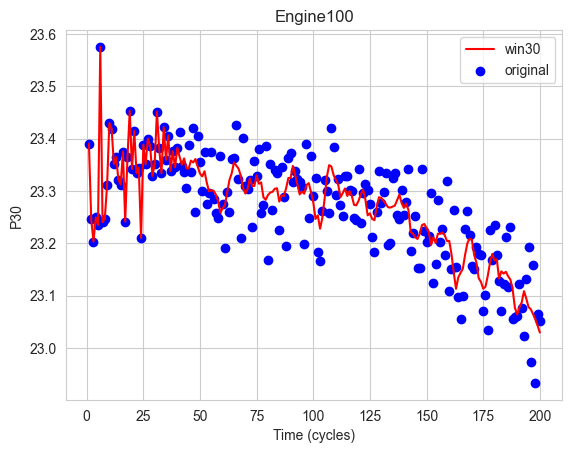

In [267]:
window_size = 40
from scipy.signal import savgol_filter

for sensor_name in sensor_names:
    df1[sensor_name + '2'] = 0

for engine_id in np.unique(df1.engine):
    for sensor_name in sensor_names:
        sensor_data = df1.loc[df1['engine'] == engine_id, sensor_name]
        smoothed_data = sensor_data.rolling(window_size).mean()
        smoothed_data = savgol_filter(sensor_data, 10, 2)
        smoothed_data[:window_size] = sensor_data[:window_size]
        df1.loc[df1['engine'] == engine_id, sensor_name + '2'] = smoothed_data

time_engine1 = df1.loc[df1['engine'] == engine_id, 'cycle']
smoothed_data = df1.loc[df1['engine'] == engine_id, sensor_name + '2']
sensor_data = df1.loc[df1['engine'] == engine_id, sensor_name]

plt.plot(time_engine1, smoothed_data, label='win30', c='red')
plt.scatter(time_engine1, sensor_data, label='original', c='blue')
plt.legend()
plt.xlabel('Time (cycles)')
plt.ylabel('P30')
plt.title('Engine' + str(engine_id))


In [268]:
y1 = df1['RUL']/400
X1 = df1.drop(['RUL', 'engine'], axis=1)/400

y_1_train = y1[df1.engine.values < 80]
y_1_test = y1[df1.engine.values >= 80]

X1_train = X1.loc[df1.engine < 80, :]
X1_test = X1.loc[df1.engine >= 80, :]

for col in X1_train.columns:
    if np.std(X1_train[col].values) != 0:
        X1_train.loc[:,col] = (X1_train[col].values - np.mean(X1_train[col].values)) / np.std(X1_train[col].values)
    else:
        X1_train.loc[:,col] = 1
for col in X1_train.columns:
    if np.std(X1_test.loc[:,col].values) != 0:
        X1_test.loc[:,col] = (X1_test[col].values - np.mean(X1_test[col].values)) / np.std(X1_test[col].values)
    else:
        X1_test.loc[:, col] = 1

In [269]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(10)
knn.fit(X1_train, y_1_train)
predictions = knn.predict(X1_test)

errors = predictions - (y_1_test)
print(np.mean(np.abs(errors))*400)
print(np.sqrt(np.mean(np.power(errors,2)))*400)

rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X1_train, y_1_train)
predictions = rfr.predict(X1_test)

errors = predictions - (y_1_test)
print(np.mean(np.abs(errors))*400)
print(np.sqrt(np.mean(np.power(errors,2)))*400)

33.69362975630611
47.6996140086184
35.484340648024435
48.31455790836968
